# 모듈 Import

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import scale,minmax_scale,robust_scale
#%matplotlib inline background 그래프 실행 및 결과 확인
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.formula.api import ols
from statsmodels.api import qqplot, add_constant
import statsmodels.formula.api as smf
from statsmodels.tools.eval_measures import rmse

#예측
from sklearn.tree import export_graphviz
import graphviz
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import GridSearchCV
#평가함수
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import accuracy_score
#모델 성능 평가
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
#confusion matrix
from sklearn.metrics import confusion_matrix

#Scale 변환:평균,표준편차 기준
from sklearn.preprocessing import StandardScaler
#주성분 분석
from sklearn.decomposition import PCA
#회귀분석
import statsmodels.api as sm
#RMSE:root mean squared error 함수
def root_mean_squared_error(y_true,y_pred):
    return np.sqrt(mean_squared_error(y_true,y_pred))
#MAPE:mean absolute percentage error 함수
def mean_absolute_percentage_error(y_true,y_pred):
    return np.mean(np.abs((y_true-y_pred)/y_true))*100
#분류 : KNN
from sklearn.neighbors import KNeighborsClassifier
#로지스틱 회귀
from statsmodels.api import Logit
#데이터 분항
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

# 숙제1. 서포트 벡터 머신

In [2]:
#데이터 구성하기
df_raw=pd.read_csv("/home/pirl/Downloads/유방암.csv", engine = 'python', encoding = 'EUC-KR')
df_raw

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [3]:
#결측치 확인
df_raw.isnull().sum(axis=0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

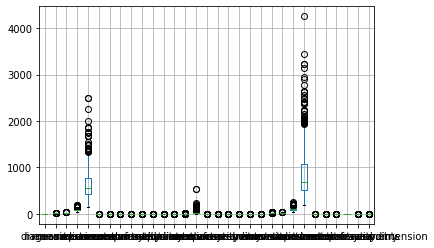

In [4]:
df_raw.boxplot()

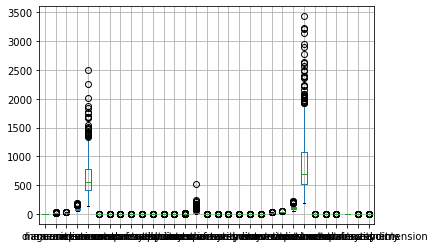

In [5]:
df_raw = df_raw[df_raw["worst area"]<4000] #이상치 제거
df_raw.boxplot()

In [6]:
df_raw_x=df_raw.drop("diagnosis", axis=1, inplace=False) #설명변수 설정
df_raw_y=df_raw["diagnosis"] #목표변수 설정
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state =1234)
df_train_x, df_validation_x, df_train_y, df_validation_y = train_test_split(df_train_x, df_train_y, test_size = 3/7, random_state =1234)
print(df_train_x.shape)
print(df_train_y.shape)
print(df_validation_x.shape)
print(df_validation_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(226, 30)
(226,)
(171, 30)
(171,)
(171, 30)
(171,)


In [7]:
svm_uncustomized=SVC(random_state=1234)
svm_uncustomized.fit(df_train_x,df_train_y)
#Train 데이터 정확도
print('Accuracy on training set:{:.3f}'.format(svm_uncustomized.score(df_train_x,df_train_y)))
#validation 데이터 정확도
print('Accuracy on validation set:{:.3f}'.format(svm_uncustomized.score(df_validation_x,df_validation_y)))

Accuracy on training set:0.934
Accuracy on validation set:0.871


In [8]:
svm_uncustomized

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

In [9]:
#train 및 validation 정확도 결과 저장용
train_accuracy=[]; validation_accuracy=[]
#c:규제(0.01,0.1,1,10)
para_c=[10**c for c in range(-2,2)]
for v_C in para_c:
    svm=SVC(C=v_C,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_validation_x,df_validation_y))

#데이터 테이블로 저장
df_accuracy_c=pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['TrainAccuracy']=train_accuracy
df_accuracy_c['validationAccuracy']=validation_accuracy

In [10]:
#C별 정확도 확인
df_accuracy_c.round(3)

,C,TrainAccuracy,validationAccuracy
0,0.01,0.646,0.608
1,0.10,0.925,0.848
2,1.00,0.934,0.871
3,10.00,0.947,0.912


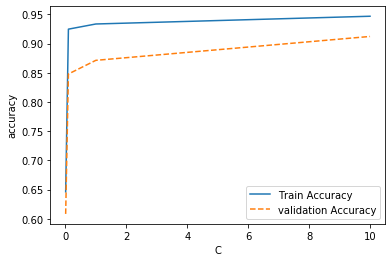

In [11]:
#모델 정확도 그래프 확인
plt.plot(para_c,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_c,validation_accuracy,linestyle='--',label='validation Accuracy')
plt.ylabel('accuracy');plt.xlabel('C')
plt.legend()
#C가 1이상이면 train 데이터 이용한 모델의 정확도는 1(과대적합)validation 정확도는 변화없음


In [12]:
#train 및 validation 정확도 결과 저장용
train_accuracy=[]; validation_accuracy=[]
#gamma:규제(0.01,0.1,1,10)
para_gamma=[10**gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=0.1,random_state=1234)
    svm.fit(df_train_x,df_train_y)
    train_accuracy.append(svm.score(df_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_validation_x,df_validation_y))

#데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['validationAccuracy']=validation_accuracy

In [13]:
#Gamma별 정확도 확인
df_accuracy_gamma.round(4)

,gamma,TrainAccuracy,validationAccuracy
0,0.01,0.646,0.6082
1,0.10,0.646,0.6082
2,1.00,0.646,0.6082
3,10.00,0.646,0.6082


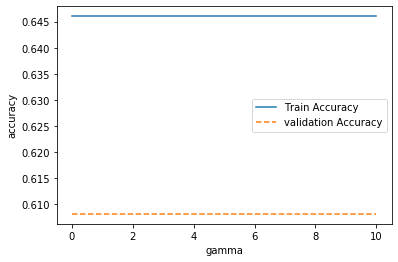

In [14]:
#모델 정확도 그래프 확인
plt.plot(para_gamma,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_gamma,validation_accuracy,linestyle='--',label='validation Accuracy')
plt.ylabel('accuracy');plt.xlabel('gamma')
plt.legend()
#gamma변화는 정확도에 영향을 미치지 않음

In [15]:
#변수명 저장
v_feature_name=df_train_x.columns
#StandardScaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()


,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.116842,-2.073477,1.293220,1.017751,1.569609,3.293080,2.684869,2.557345,2.218787,2.253847,...,1.920787,-1.357495,2.347412,2.075177,1.306818,2.619022,2.118408,2.308346,2.747892,1.934858
1,1.858317,-0.351281,1.714585,1.964534,-0.825262,-0.484864,-0.017947,0.557829,0.002995,-0.870191,...,1.838879,-0.367526,1.566880,1.960932,-0.375032,-0.428597,-0.143643,1.094989,-0.244452,0.280071
2,1.605411,0.459712,1.593599,1.606213,0.943499,1.058138,1.382903,2.058311,0.941147,-0.399601,...,1.540646,-0.022340,1.376284,1.513022,0.527211,1.085033,0.860644,1.966039,1.150682,0.200322
3,-0.771332,0.256964,-0.593328,-0.773562,3.284297,3.412707,1.940707,1.468307,2.868558,4.908711,...,-0.278150,0.135600,-0.246194,-0.556613,3.391611,3.895968,1.998163,2.187622,6.040926,4.930977
4,1.777847,-1.150622,1.806368,1.880051,0.281815,0.543551,1.390509,1.444915,-0.007956,-0.564024,...,1.324323,-1.464959,1.367209,1.270026,0.220623,-0.311528,0.618230,0.735872,-0.868464,-0.397794


In [29]:
#데이터 분할
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3,random_state=1234)
df_scaled_train_x,df_scaled_validation_x=train_test_split(df_scaled_train_x,test_size=3/7,random_state=1234)
print("train data X size:{}".format(df_scaled_train_x.shape))
print("validation data X size:{}".format(df_scaled_validation_x.shape))
print("test data X size:{}".format(df_scaled_test_x.shape))

train data X size:(226, 30)
validation data X size:(171, 30)
test data X size:(171, 30)


In [30]:
#변수명 저장
v_feature_name=df_train_x.columns
#StandardScaler 적용
scaler=StandardScaler()
df_scaled=scaler.fit_transform(df_raw_x)
df_scaled=pd.DataFrame(df_scaled,columns=v_feature_name)
df_scaled.head()#데이터 분할
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3,random_state=1234)
df_scaled_train_x,df_scaled_validation_x=train_test_split(df_scaled_train_x,test_size=3/7,random_state=1234)
print("train data X size:{}".format(df_scaled_train_x.shape))
print("validation data X size:{}".format(df_scaled_validation_x.shape))
print("test data X size:{}".format(df_scaled_test_x.shape))

train data X size:(226, 30)
validation data X size:(171, 30)
test data X size:(171, 30)


In [31]:
svm_scaled=SVC(random_state=1234)
svm_scaled.fit(df_scaled_train_x,df_train_y)
#train 데이터 셋 정확도
print('Accuracy on training set:{:.3f}'.format(svm_scaled.score(df_scaled_train_x,df_train_y)))
#validation 데이터 셋 정확도
print('Accuracy on validation set:{:.3f}'.format(svm_scaled.score(df_scaled_validation_x,df_validation_y)))

Accuracy on training set:1.000
Accuracy on validation set:0.959


In [32]:
#train 및 validation 정확도 결과 저장용
train_accuracy=[]; validation_accuracy=[]
#c:규제(0.01,0.1,1,10)
para_c=[10**c for c in range(-2,2)]
for v_C in para_c:
    svm=SVC(C=v_C,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_scaled_validation_x,df_validation_y))

#데이터 테이블로 저장
df_accuracy_c=pd.DataFrame()
df_accuracy_c['C']=para_c
df_accuracy_c['TrainAccuracy']=train_accuracy
df_accuracy_c['validationAccuracy']=validation_accuracy

In [33]:
#C별 정확도 확인
df_accuracy_c.round(3)

,C,TrainAccuracy,validationAccuracy
0,0.01,0.646,0.608
1,0.10,0.978,0.942
2,1.00,1.000,0.959
3,10.00,1.000,0.953


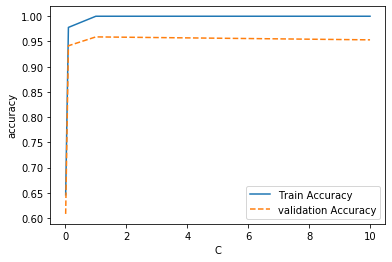

In [34]:
#모델 정확도 그래프 확인
plt.plot(para_c,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_c,validation_accuracy,linestyle='--',label='validation Accuracy')
plt.ylabel('accuracy');plt.xlabel('C')
plt.legend()
#C=1 임의로 지정

In [35]:
#train 및 validation 정확도 결과 저장용
train_accuracy=[]; validation_accuracy=[]
#gamma:규제(0.01,0.1,1,10)
para_gamma=[10**gamma for gamma in range(-2,2)]
for v_gamma in para_gamma:
    svm=SVC(gamma=v_gamma,C=1,random_state=1234)
    svm.fit(df_scaled_train_x,df_train_y)
    train_accuracy.append(svm.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(svm.score(df_scaled_validation_x,df_validation_y))

#데이터 테이블로 저장
df_accuracy_gamma=pd.DataFrame()
df_accuracy_gamma['gamma']=para_gamma
df_accuracy_gamma['TrainAccuracy']=train_accuracy
df_accuracy_gamma['validationAccuracy']=validation_accuracy

In [36]:
#Gamma별 정확도 확인
df_accuracy_gamma.round(3)

,gamma,TrainAccuracy,validationAccuracy
0,0.01,0.996,0.959
1,0.10,1.000,0.942
2,1.00,1.000,0.608
3,10.00,1.000,0.608


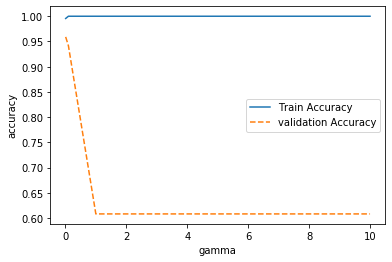

In [37]:
#Gamma별 정확도 그래프 확인
plt.plot(para_gamma,train_accuracy,linestyle='-',label='Train Accuracy')
plt.plot(para_gamma,validation_accuracy,linestyle='--',label='validation Accuracy')
plt.ylabel('accuracy');plt.xlabel('gamma')
plt.legend()
#gamma=0.1 임의로 지정

In [38]:
#최종 모델
svc_final=SVC(gamma=0.1,C=1,random_state=1234)
svc_final.fit(df_scaled_train_x,df_train_y)
#평가
y_pred=svc_final.predict(df_scaled_test_x)
#Train 데이터 정확도
print('Accuracy on training set:{:.3f}'.format(svc_final.score(df_scaled_train_x,df_train_y)))
#validation 데이터 정확도
print('Accuracy on validation set:{:.3f}'.format(svc_final.score(df_scaled_validation_x,df_validation_y)))
#confusion matrix
print('Confusion matrix:\n{}'.format(confusion_matrix(df_validation_y,y_pred)))

Accuracy on training set:1.000
Accuracy on validation set:0.942
Confusion matrix:
[[71 33]
 [37 30]]


In [39]:
#GridSearchCV를 이용한 최적 parameter 찾기
estimator=SVC(random_state=1234)
#구하고자 하는 parameter와 범위
param_grid={'C':para_c,'gamma':para_gamma}
#정확도가 높은 최적 parameter 찾기
grid_svc=GridSearchCV(estimator,param_grid,scoring='accuracy',n_jobs=-1)
grid_svc.fit(df_scaled_train_x,df_train_y)

print("best estimator model:\n{}".format(grid_svc.best_estimator_))
print("\nbest parameter:\n{}".format(grid_svc.best_params_))
print("\nbest score:\n{}".format(grid_svc.best_score_.round(3)))

best estimator model:
SVC(C=10, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.01, kernel='rbf',
    max_iter=-1, probability=False, random_state=1234, shrinking=True,
    tol=0.001, verbose=False)

best parameter:
{'C': 10, 'gamma': 0.01}

best score:
0.996


In [40]:
df_pred = pd.DataFrame({'prediction':svc_final.predict(df_test_x)}) #예측값
df_pred.describe()

,prediction
count,171.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [41]:
df_test_y.describe() #실제값

count    171.000000
mean       0.374269
std        0.485355
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

test 결과 예측값과 실제값이 비슷하므로 잘 설계된 의사결정 나무이다

# 숙제2. 인공신경망

In [42]:
df_raw = pd.read_csv("/home/pirl/Downloads/유방암.csv", engine = 'python', encoding = 'EUC-KR')
df_raw.head() #데이터 불러오기

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [43]:
df_raw.isnull().sum(axis=0) #결측치 확인

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

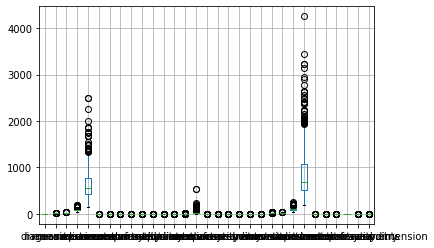

In [44]:
df_raw.boxplot()

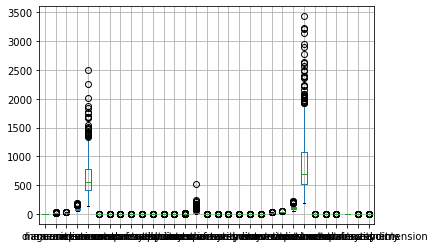

In [45]:
df_raw = df_raw[df_raw["worst area"]<4000] #이상치 제거
df_raw.boxplot()

In [46]:
df_raw_x=df_raw.drop("diagnosis", axis=1, inplace=False) #설명변수 설정
df_raw_y=df_raw["diagnosis"] #목표변수 설정
df_train_x, df_test_x, df_train_y, df_test_y = train_test_split(df_raw_x, df_raw_y, test_size = 0.3, random_state =1234)
df_train_x, df_valid_x, df_train_y, df_valid_y = train_test_split(df_train_x, df_train_y, test_size = 3/7, random_state =1234)
print(df_train_x.shape)
print(df_train_y.shape)
print(df_valid_x.shape)
print(df_valid_y.shape)
print(df_test_x.shape)
print(df_test_y.shape)

(226, 30)
(226,)
(171, 30)
(171,)
(171, 30)
(171,)


In [47]:
nn_uncustomized = MLPClassifier(random_state = 1234)
#hidden_layer_sizes = (100, 100) 변경은닉층 2개. 각 은닉층 노드 100개)
nn_uncustomized.fit(df_train_x, df_train_y)
#train set 정확도
print("Accuracy on traning set: {:.3f}".format(nn_uncustomized.score(df_train_x, df_train_y)))
#validation set 정확도
print("Accuracy on validation set: {:.3f}".format(nn_uncustomized.score(df_validation_x, df_validation_y)))

Accuracy on traning set: 0.942
Accuracy on validation set: 0.889


In [48]:
nn_uncustomized #현재 생성된 SVC모델의 옵션 확인

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(100,), learning_rate='constant',
              learning_rate_init=0.001, max_fun=15000, max_iter=200,
              momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
              power_t=0.5, random_state=1234, shuffle=True, solver='adam',
              tol=0.0001, validation_fraction=0.1, verbose=False,
              warm_start=False)

In [49]:
#train 및 validation 정확도 결과 저장용
train_accuracy = []; validation_accuracy =[]
#hidden_layer_sizes: 은닉층(20, 40, 60, 80, 100, 120, 140, 160)
para_hidden = [20 * hidden for hidden in range(1,9)]

for v_hidden in para_hidden:
    nn = MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234) #1D (20,)(40,)..
#nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden)), random_state = 1234 
#2D (20,20), (40,40).....
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_validation_x, df_validation_y))
#데이터 테이블로 저장    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["validationAccuracy"] = validation_accuracy
#은닉층별 정확도 테이블
df_accuracy_hidden.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.

,HiddenLayer,TrainAccuracy,validationAccuracy
0,20,0.903,0.854
1,40,0.929,0.895
2,60,0.942,0.906
3,80,0.960,0.906
4,100,0.942,0.889
5,120,0.938,0.889
6,140,0.951,0.912
7,160,0.938,0.918


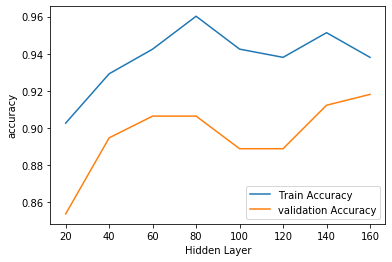

In [50]:
#모델 정확도 그래프 확인
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_hidden, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()

In [51]:
#train 및 validation 정확도 결과 저장용
train_accuracy = []; validation_accuracy =[]
#activation 변경
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, random_state = 1234)
    nn.fit(df_train_x, df_train_y)
    train_accuracy.append(nn.score(df_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_validation_x, df_validation_y))
#데이터 테이블로 저장    
df_accuracy_function = pd.DataFrame()
df_accuracy_function["Activation Function"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["validationAccuracy"] = validation_accuracy
#Activaion Function별 정확도 테이블
df_accuracy_function.round(3)
#relu함수 적용시 모델의 정확도가 상대적으로 낮음, 단 scale변환 후 모델 성능 비교 필요

,Activation Function,TrainAccuracy,validationAccuracy
0,logistic,0.942,0.901
1,tanh,0.947,0.901
2,relu,0.942,0.889


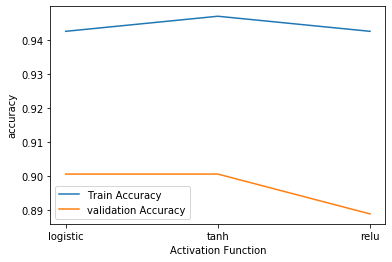

In [52]:
#모델 정확도 그래프 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Activation Function")
plt.legend()

In [53]:
#변수명 저장
v_feature_name = df_train_x.columns
#StandardScaler 적용
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_raw_x)
df_scaled = pd.DataFrame(df_scaled, columns=v_feature_name)
df_scaled.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1.116842,-2.073477,1.293220,1.017751,1.569609,3.293080,2.684869,2.557345,2.218787,2.253847,...,1.920787,-1.357495,2.347412,2.075177,1.306818,2.619022,2.118408,2.308346,2.747892,1.934858
1,1.858317,-0.351281,1.714585,1.964534,-0.825262,-0.484864,-0.017947,0.557829,0.002995,-0.870191,...,1.838879,-0.367526,1.566880,1.960932,-0.375032,-0.428597,-0.143643,1.094989,-0.244452,0.280071
2,1.605411,0.459712,1.593599,1.606213,0.943499,1.058138,1.382903,2.058311,0.941147,-0.399601,...,1.540646,-0.022340,1.376284,1.513022,0.527211,1.085033,0.860644,1.966039,1.150682,0.200322
3,-0.771332,0.256964,-0.593328,-0.773562,3.284297,3.412707,1.940707,1.468307,2.868558,4.908711,...,-0.278150,0.135600,-0.246194,-0.556613,3.391611,3.895968,1.998163,2.187622,6.040926,4.930977
4,1.777847,-1.150622,1.806368,1.880051,0.281815,0.543551,1.390509,1.444915,-0.007956,-0.564024,...,1.324323,-1.464959,1.367209,1.270026,0.220623,-0.311528,0.618230,0.735872,-0.868464,-0.397794


In [54]:
#데이터 분할
df_scaled_train_x,df_scaled_test_x=train_test_split(df_scaled,test_size=0.3,random_state=1234)
df_scaled_train_x,df_scaled_validation_x=train_test_split(df_scaled_train_x,test_size=3/7,random_state=1234)
print("train data X size:{}".format(df_scaled_train_x.shape))
print("valid data X size:{}".format(df_scaled_validation_x.shape))
print("test data X size:{}".format(df_scaled_test_x.shape))

train data X size:(226, 30)
valid data X size:(171, 30)
test data X size:(171, 30)


In [55]:
nn_scaled = MLPClassifier(random_state = 1234)
nn_scaled.fit(df_scaled_train_x, df_train_y)
#train set 정확도
print("Accuracy on traning set: {:.3f}".format(nn_scaled.score(df_scaled_train_x, df_train_y)))
#validation set 정확도
print("Accuracy on validation set: {:.3f}".format(nn_scaled.score(df_scaled_validation_x, df_validation_y)))

Accuracy on traning set: 1.000
Accuracy on validation set: 0.959


In [56]:
#train 및 validation 정화도 결과 저장용
train_accuracy = []; validation_accuracy =[]
#hidden_layer_sizes: 은닌층 변경(20~240, by30)
para_hidden = [20 * hidden for hidden in range(1,11)]

for v_hidden in para_hidden:
#nn=MLPClassifier(hidden_layer_sizes = v_hidden, random_state = 1234)
    nn = MLPClassifier(hidden_layer_sizes = (v_hidden, v_hidden), random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_scaled_validation_x, df_validation_y))
#데이터 레이블로 저장    
df_accuracy_hidden = pd.DataFrame()
df_accuracy_hidden["HiddenLayer"] = para_hidden
df_accuracy_hidden["TrainAccuracy"] = train_accuracy
df_accuracy_hidden["validationAccuracy"] = validation_accuracy
df_accuracy_hidden.round(3)

,HiddenLayer,TrainAccuracy,validationAccuracy
0,20,1.0,0.965
1,40,1.0,0.959
2,60,1.0,0.965
3,80,1.0,0.971
4,100,1.0,0.965
5,120,1.0,0.959
6,140,1.0,0.965
7,160,1.0,0.959
8,180,1.0,0.959
9,200,1.0,0.959


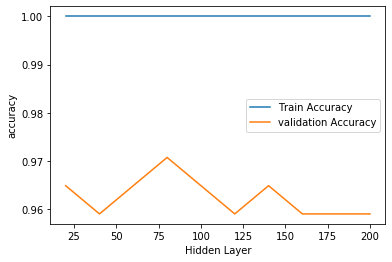

In [57]:
#은닉층별 정확도 테이블
plt.plot(para_hidden, train_accuracy, linestyle = "-", label = "Train Accuracy")
#모델 정확도 그래프 확인
plt.plot(para_hidden, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Hidden Layer")
plt.legend()
#은닉층 지정(임의)
hidden_layer_sizes = 80

In [58]:
#train 및 validation 정확도 결과 저장용
train_accuracy = []; validation_accuracy =[]
#activation 변경
para_function = ["logistic", "tanh", "relu"]

for v_function in para_function:
    nn = MLPClassifier(activation = v_function, hidden_layer_sizes = (80,80),
                       random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_scaled_validation_x, df_validation_y))
#데이터 테이블로 저장
df_accuracy_function = pd.DataFrame()
df_accuracy_function["ActivationFunction"] = para_function
df_accuracy_function["TrainAccuracy"] = train_accuracy
df_accuracy_function["validationAccuracy"] = validation_accuracy
#Activation Function별 정확도 테이블
df_accuracy_function.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,ActivationFunction,TrainAccuracy,validationAccuracy
0,logistic,1.0,0.971
1,tanh,1.0,0.971
2,relu,1.0,0.971


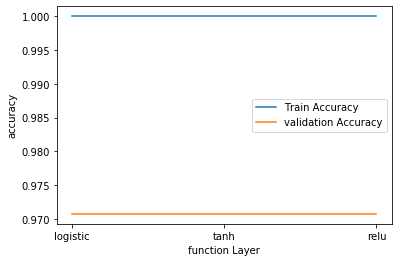

In [59]:
#Activation Function별 정확도 그래프로 확인
plt.plot(para_function, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_function, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.ylabel("accuracy"); plt.xlabel("function Layer")
plt.legend()
#Activation Function 지정(임의)
activation = "relu" #값이 같으므로 임의로 지정 (스케일 전에는 rulu의 성능이 제일 안좋았음)

In [60]:
#train 및 validation 정확도 결과 저장용
train_accuracy = []; validation_accuracy =[]
#solver 변경
para_solver = ["lbfgs", "sgd", "adam"]

for v_solver in para_solver:
    nn=MLPClassifier(solver = v_solver, activation = "relu", hidden_layer_sizes = (80,80), random_state=1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x, df_train_y))
    validation_accuracy.append(nn.score(df_scaled_validation_x, df_validation_y))
    
#데이터 테이블로 저장
df_accuracy_solver = pd.DataFrame()
df_accuracy_solver["Solver"] = para_solver
df_accuracy_solver["TrainAccuracy"] = train_accuracy
df_accuracy_solver["validationAccuracy"] = validation_accuracy
#Solver별 정확도 테이블
df_accuracy_solver.round(3)

/home/pirl/anaconda3/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


,Solver,TrainAccuracy,validationAccuracy
0,lbfgs,1.000,0.965
1,sgd,0.996,0.959
2,adam,1.000,0.971


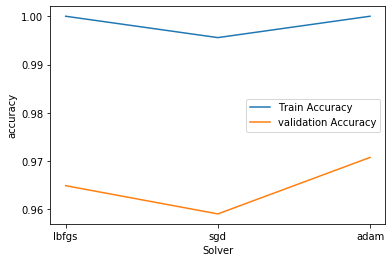

In [61]:
#정확로 그래프 표현
plt.plot(para_solver, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_solver, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Solver")
plt.legend()
#Solver 지정(임의)
solver = "adam" #아담의 성능이 가장좋음

In [62]:
#train 및 validation 정확도 결과 저장용
train_accuracy = []; validation_accuracy =[]
#Mini Batch 변경:
para_batch = [20 * batch for batch in range(1, 10)]

for v_batch in para_batch:
    nn = MLPClassifier(batch_size = v_batch, solver = "adam", 
                       activation = "relu", hidden_layer_sizes = (80,80),
                       random_state = 1234)
    nn.fit(df_scaled_train_x, df_train_y)
    train_accuracy.append(nn.score(df_scaled_train_x,df_train_y))
    validation_accuracy.append(nn.score(df_scaled_validation_x, df_validation_y))

#데이터 테이블로 저장
df_accuracy_batch = pd.DataFrame()
df_accuracy_batch["Mini Batch"] = para_batch
df_accuracy_batch["TrainAccuracy"] = train_accuracy
df_accuracy_batch["validationAccuracy"] = validation_accuracy
#Mini Batch Size별 정확도 테이블
df_accuracy_batch.round(3)

,Mini Batch,TrainAccuracy,validationAccuracy
0,20,1.0,0.959
1,40,1.0,0.959
2,60,1.0,0.959
3,80,1.0,0.959
4,100,1.0,0.965
5,120,1.0,0.965
6,140,1.0,0.965
7,160,1.0,0.965
8,180,1.0,0.965


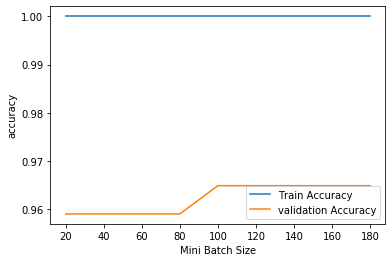

In [63]:
#정확도 그래프 표현
plt.plot(para_batch, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_batch, validation_accuracy, linestyle = "-", label = "validation Accuracy")
plt.ylabel("accuracy"); plt.xlabel("Mini Batch Size")
plt.legend()

In [64]:
#최종 모델
nn_final = MLPClassifier(hidden_layer_sizes = (80,80), activation = "relu", 
                         solver = "adam", batch_size =100, random_state = 1234)
nn_final.fit(df_scaled_train_x, df_train_y)
#평가
y_pred = nn_final.predict(df_scaled_validation_x)
#train 데이터셋 정확도
print("Accuracy on training set: {:.3f}\n".format(nn_final.score(df_scaled_train_x, df_train_y)))
#validation 데이터셋 정확도
print("Accuracy on validation set: {:.3f}\n".format(nn_final.score(df_scaled_validation_x, df_validation_y)))
#confusion matrix 정확도
print("Confusion Matrix:\n{}".format(confusion_matrix(df_validation_y, y_pred)))

Accuracy on training set: 1.000

Accuracy on validation set: 0.965

Confusion Matrix:
[[101   3]
 [  3  64]]


In [66]:
df_pred = pd.DataFrame({'prediction':nn_final.predict(df_test_x)}) #예측값
df_pred.describe()

,prediction
count,171.0
mean,1.0
std,0.0
min,1.0
25%,1.0
50%,1.0
75%,1.0
max,1.0


In [67]:
df_test_y.describe() #실제값

count    171.000000
mean       0.374269
std        0.485355
min        0.000000
25%        0.000000
50%        0.000000
75%        1.000000
max        1.000000
Name: diagnosis, dtype: float64

test 결과 예측값과 실제값이 비슷하므로 잘 설계된 의사결정 나무이다

# 숙제3. 서포트 벡터 머신

In [75]:
#데이터 구성하기
df=pd.read_csv("/home/pirl/Downloads/유방암.csv", engine = 'python', encoding = 'EUC-KR')
df

,diagnosis,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,...,worst radius,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,1,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,1,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,1,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,1,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [76]:
#결측치 확인
df.isnull().sum(axis=0)

diagnosis                  0
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimeter            0
worst area                 0
worst smoothness           0
worst compactness          0
worst concavity            0
worst concave points       0
worst symmetry             0
worst fractal dimension    0
dtype: int64

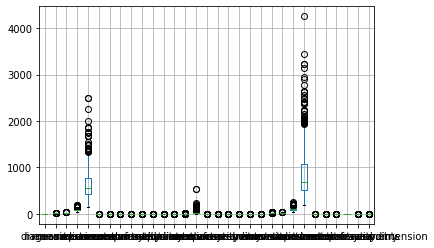

In [77]:
df.boxplot()

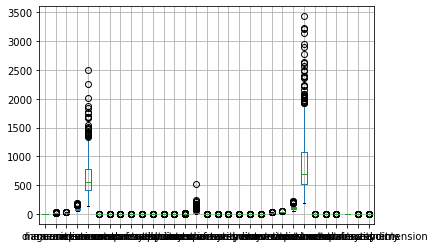

In [79]:
df= df[df["worst area"]<4000] #이상치 제거
df.boxplot()

In [80]:
df_y=df['diagnosis'] #목표변수 설정
df_x=df.drop('diagnosis',axis=1,inplace=False) #설명변수 설정
df_train_x_before,df_test_x,df_train_y_before,df_test_y=train_test_split(df_x,df_y,test_size=0.3,random_state=1234)
print('train data X size : {}'.format(df_train_x_before.shape))
print('train data Y size : {}'.format(df_train_y_before.shape))
print('test data X size : {}'.format(df_test_x.shape))
print('test data X size : {}'.format(df_test_y.shape))

train data X size : (397, 30)
train data Y size : (397,)
test data X size : (171, 30)
test data X size : (171,)


In [81]:
#학습 데이터 validation / training 구분 (4:3)
df_train_x, df_val_x , df_train_y,df_val_y = train_test_split(df_train_x_before,df_train_y_before,\
test_size = 3/7, random_state = 1234)

print("train x:",df_train_x.shape)
print("train y:",df_train_y.shape)
print("test x:",df_val_x.shape)
print("test y:",df_val_y.shape)

#train / validation 데이터 4:3으로 구분

train x: (226, 30)
train y: (226,)
test x: (171, 30)
test y: (171,)


In [82]:
# train과 validation을 통해 학습 후 test데이터로 테스트 한다

In [83]:
#KNN 모델 생성(default 설정)
knn_uncustomized=KNeighborsClassifier()

knn_uncustomized.fit(df_train_x,df_train_y)

#train 데이터 셋 정확도
print("Accuracy on training set : {:.3f}".format(knn_uncustomized.score(df_train_x,df_train_y)))

#test 데이터 셋 정확도
print("Accuracy on test set : {:.3f}".format(knn_uncustomized.score(df_test_x,df_test_y)))

#성능은 유사하나 다소 과소적합

Accuracy on training set : 0.960
Accuracy on test set : 0.930


In [84]:
knn_uncustomized

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [85]:
#train 및 test 정확도 결과 저장
train_accuracy = []
test_accuracy = []

#최대 이웃 수: 1~15
para_n_neighbors = [i for i in range(1,16)]

for v_n_neighbors in para_n_neighbors :
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_val_x,df_val_y))

#데이터 테이블로 저장
#결과 저장
df_accuracy_neighbors = pd.DataFrame()
df_accuracy_neighbors["Neighbors"] = para_n_neighbors
df_accuracy_neighbors["Train Accuracy"] = train_accuracy
df_accuracy_neighbors["Test Accuracy"] = test_accuracy
df_accuracy_neighbors.round(3)

,Neighbors,Train Accuracy,Test Accuracy
0,1,1.000,0.883
1,2,0.960,0.883
2,3,0.969,0.912
3,4,0.960,0.895
4,5,0.960,0.889
5,6,0.956,0.901
6,7,0.951,0.901
7,8,0.938,0.883
8,9,0.942,0.901
9,10,0.938,0.883


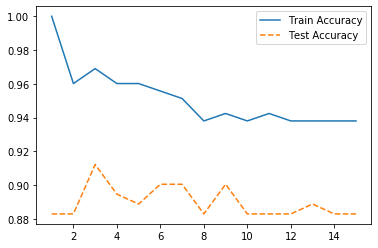

In [86]:
#모델 정확도 그래프 확인
plt.plot(para_n_neighbors, train_accuracy, linestyle = "-", label = "Train Accuracy")
plt.plot(para_n_neighbors, test_accuracy, linestyle = "--", label = "Test Accuracy")
plt.legend()

#임의로 성능차이를 고려하여 이웃 수 3으로 지정
n_neighbors =8

In [87]:
#train 및 test 정확도 결과 저장
train_accuracy = []
test_accuracy = []

#이웃 수: 1~15
para_n_neighbors = [i for i in range(1,11)]*2

#가중치(uniform, distance)
para_weights = (["uniform"])*10 + (["distance"]*10)

#zip(list1,list2,...)를 사용하면 list1과 list2의 인덱스별 값을 하나씩 가져옴
#1번 loop: n_neighbors = para_n_neighbors[0], weights = para_weights[0]
#2번 loop: n_neighbors = para_n_neighbors[1], weights = para_weights[1]

for (v_n_neighbors,v_weights) in zip(para_n_neighbors, para_weights) :
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, weights = v_weights)
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_val_x,df_val_y))

#데이터 테이블로 저장
#결과 저장
df_accuracy_weights = pd.DataFrame()
df_accuracy_weights["Neighbors"] = para_n_neighbors
df_accuracy_weights["Weights"] = para_weights
df_accuracy_weights["Train Accuracy"] = train_accuracy
df_accuracy_weights["Test Accuracy"] = test_accuracy
df_accuracy_weights.round(3)

,Neighbors,Weights,Train Accuracy,Test Accuracy
0,1,uniform,1.000,0.883
1,2,uniform,0.960,0.883
2,3,uniform,0.969,0.912
3,4,uniform,0.960,0.895
4,5,uniform,0.960,0.889
5,6,uniform,0.956,0.901
6,7,uniform,0.951,0.901
7,8,uniform,0.938,0.883
8,9,uniform,0.942,0.901
9,10,uniform,0.938,0.883


In [88]:
#그림을 그리기 위해 데이터의 형태를 변환
df_accuracy_weights_pivot = df_accuracy_weights.pivot(index = "Neighbors",columns = "Weights",
                                                      values = ["Train Accuracy","Test Accuracy"])

df_accuracy_weights_pivot

Train Accuracy           Test Accuracy          
Weights         distance   uniform      distance   uniform
Neighbors                                                 
1                    1.0  1.000000      0.883041  0.883041
2                    1.0  0.960177      0.883041  0.883041
3                    1.0  0.969027      0.923977  0.912281
4                    1.0  0.960177      0.906433  0.894737
5                    1.0  0.960177      0.900585  0.888889
6                    1.0  0.955752      0.900585  0.900585
7                    1.0  0.951327      0.900585  0.900585
8                    1.0  0.938053      0.906433  0.883041
9                    1.0  0.942478      0.906433  0.900585
10                   1.0  0.938053      0.900585  0.883041

In [89]:
#pivot을 이용할 경우, columns와 values이 2개의 level로 이루어지므로 하나의 level로 변환
level0 = df_accuracy_weights_pivot.columns.get_level_values(0)
level1 = df_accuracy_weights_pivot.columns.get_level_values(1)
df_accuracy_weights_pivot.columns = level0 + "_" + level1
df_accuracy_weights_pivot.head()

,Train Accuracy_distance,Train Accuracy_uniform,Test Accuracy_distance,Test Accuracy_uniform
Neighbors,,,,
1,1.0,1.000000,0.883041,0.883041
2,1.0,0.960177,0.883041,0.883041
3,1.0,0.969027,0.923977,0.912281
4,1.0,0.960177,0.906433,0.894737
5,1.0,0.960177,0.900585,0.888889


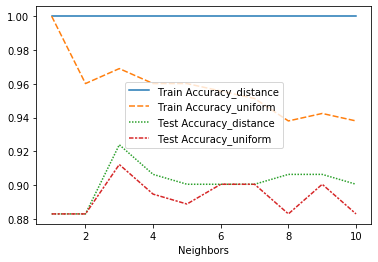

In [90]:
#그래프 생성, 변수별 linestyle 구분
sns.lineplot(data = df_accuracy_weights_pivot)

In [91]:
#가중치 distance일 떄 모델의 정확도는 1 (과대적합)

In [92]:
#과대적합 방지를 위해 uniform으로 가중치 지정
weights = "uniform"

In [93]:
#train 및 test 정확도 결과 저장
train_accuracy = []
test_accuracy = []

#이웃 수
para_n_neighbors = [i for i in range(1,11)]*3

#거리 계산 방법 (minkowski, euclidean, manhattan)
para_metric = ["minkowski"]*10 + ["euclidean"]*10 + ["manhattan"]*10

for (v_n_neighbors,v_metric) in zip(para_n_neighbors, para_metric) :
    knn = KNeighborsClassifier(n_neighbors=v_n_neighbors, metric = v_metric,weights = "uniform")
    knn.fit(df_train_x,df_train_y)
    train_accuracy.append(knn.score(df_train_x, df_train_y))
    test_accuracy.append(knn.score(df_val_x,df_val_y))

#데이터 테이블로 저장
#결과 저장
df_accuracy_metric = pd.DataFrame()
df_accuracy_metric["Neighbors"] = para_n_neighbors
df_accuracy_metric["Metric"] = para_metric
df_accuracy_metric["Train Accuracy"] = train_accuracy
df_accuracy_metric["Test Accuracy"] = test_accuracy
df_accuracy_metric.round(3)

,Neighbors,Metric,Train Accuracy,Test Accuracy
0,1,minkowski,1.000,0.883
1,2,minkowski,0.960,0.883
2,3,minkowski,0.969,0.912
3,4,minkowski,0.960,0.895
4,5,minkowski,0.960,0.889
5,6,minkowski,0.956,0.901
6,7,minkowski,0.951,0.901
7,8,minkowski,0.938,0.883
8,9,minkowski,0.942,0.901
9,10,minkowski,0.938,0.883


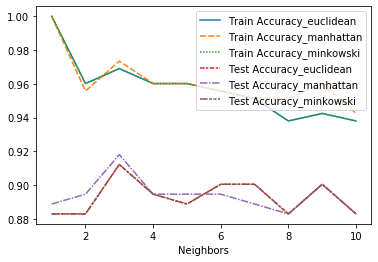

In [94]:
#정확도를 그래프로 그림
df_accuracy_metric_pivot = df_accuracy_metric.pivot(index = "Neighbors",columns = "Metric",
                                                      values = ["Train Accuracy","Test Accuracy"])


level0 = df_accuracy_metric_pivot.columns.get_level_values(0)
level1 = df_accuracy_metric_pivot.columns.get_level_values(1)
df_accuracy_metric_pivot.columns = level0 + "_" + level1
sns.lineplot(data = df_accuracy_metric_pivot)

#성능 고려하여 manhatan으로 거리 계산 방법 지정

In [95]:
# 최종 모델

# 이웃수 = 8 / 가중치 = uniform / 거리계산방법 = manhattan으로 설정한 knn모델
knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights = "uniform", metric = "manhattan")
knn_model.fit(df_train_x,df_train_y)

# 평가
y_pred = knn_model.predict(df_test_x)

#train 데이터 셋 정확도
print("train data accuracy:",knn_model.score(df_train_x,df_train_y))

#test 데이터 셋 정확도
print("test data accuracy:",knn_model.score(df_test_x,df_test_y))

#confusion matrix
print("Confusion matrix:\n",confusion_matrix(df_test_y,y_pred))

train data accuracy: 0.9513274336283186
test data accuracy: 0.8947368421052632
Confusion matrix:
 [[105   2]
 [ 16  48]]


# 정리

금일은 서포터 벡터 머신(SVM), 인공지능망, KNN에 대해서 학습하였다.
만약 내가 의사결정자라면, 속성들 간의 의존성을 고려하지않고 결과에 대해 높은 정확도를 제공하는 SVM을 선택할 것이다.
또한, 이번 숙제를 통해 SVM과 인공지능망은 scale을 통해 더 좋은 결과 값을 얻을 수 있다는 사실을 알게되었다.
복잡한 모델을 만들기 위해서는 인공지능망을 쓸것이다. 데이터가 커지면 학습에 오래걸리고, 하이퍼파라미터 선택에 민감하지만,
복잡하게 엉켜있는 여러가지 요인들을 처리하기 위해서는 적합하기 때문이다.
일정한 정도의 사건을 예측하는 것이라면 KNN을 사용할 것이다. KNN은 대략적인 값(범주)를 유추하는 특성을 갖고있기 때문이다.
